In [9]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
#from nsepy import get_history
from tabulate import tabulate
import yfinance as yf
#
import stock
import optimization
import riskmanagement
#
import cvxpy as cp
import sys

import pypfopt
from pypfopt import risk_models, expected_returns, plotting
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import EfficientSemivariance
from pypfopt import EfficientCVaR
from pypfopt import CLA
from pypfopt import HRPOpt
from pypfopt import DiscreteAllocation

In [35]:
tickers = ["^NSEBANK", "HDFCBANK.NS","ICICIBANK.NS","KOTAKBANK.NS","AXISBANK.NS","INDUSINDBK.NS"]

ohlc = yf.download(tickers, start="2021-05-01", end="2022-07-11")
#ohlc = yf.download(tickers, period="max")
prices = ohlc["Close"]
#prices = prices.fillna(0)
prices.tail(4)

[*********************100%***********************]  6 of 6 completed


,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,INDUSINDBK.NS,KOTAKBANK.NS,^NSEBANK
Date,,,,,,
2022-07-05,648.500000,1352.599976,719.450012,824.049988,1663.050049,33815.898438
2022-07-06,657.950012,1371.250000,725.950012,836.549988,1704.500000,34324.250000
2022-07-07,658.150024,1395.800049,742.000000,861.000000,1738.500000,34920.300781
2022-07-08,669.150024,1397.099976,755.700012,848.599976,1744.750000,35124.050781


In [20]:
rets = expected_returns.returns_from_prices(prices)
#rets.tail()
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AXISBANK.NS', 0.15443),
             ('HDFCBANK.NS', 0.28465),
             ('ICICIBANK.NS', 0.17742),
             ('INDUSINDBK.NS', 0.14662),
             ('KOTAKBANK.NS', 0.23688)])

In [21]:
hrp.portfolio_performance(verbose=True);

Expected annual return: -0.3%
Annual volatility: 21.3%
Sharpe Ratio: -0.11


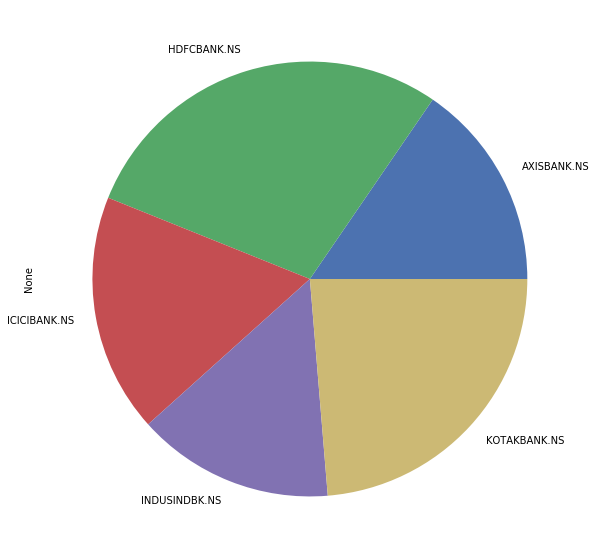

In [22]:
fig1 = pd.Series(weights).plot.pie(figsize=(10, 10));

In [14]:
W1 = pd.DataFrame([weights])
W = W1.iloc[0].to_numpy()*100
W

array([15.632, 28.409, 17.987, 14.56 , 23.412])

In [36]:
#dfn = prices.drop(['Date'], axis=1)
Rt = prices.pct_change()*100

In [38]:
d = dict(B= np.around(prices["AXISBANK.NS"],2), C=np.around(Rt['AXISBANK.NS'],2), 
         D= np.around(prices["HDFCBANK.NS"],2), E=np.around(Rt['HDFCBANK.NS'],2),
         F= np.around(prices["ICICIBANK.NS"],2), G=np.around(Rt['ICICIBANK.NS'],2),
         H= np.around(prices["INDUSINDBK.NS"],2), I=np.around(Rt['INDUSINDBK.NS'],2),
         J= np.around(prices["KOTAKBANK.NS"],2), K=np.around(Rt['KOTAKBANK.NS'],2),
        L=np.around(prices["^NSEBANK"],2), M=np.around(Rt['^NSEBANK'],2) )
Ret = pd.DataFrame(dict([ (pd.Series(k)) for k in d.items() ]))
Ret.columns = ["AXISBANK", "AXIS_Rt %", "HDFCBANK","HDFC_Rt %", 
              "ICICIBANK", "ICICI_Rt %","INDUSINDBK","INDUSINDBK_Rt %", 
              "KOTAKBANK", "KOTAKBANK_Rt %" ,
              "^NSEBANK","^NSEBANK_Rt %"]

In [39]:
Ret.to_csv("/home/kishor/Banknifty_Return.csv")

In [16]:
W = np.array([ 15.632, 28.409, 17.987, 14.56 , 23.412])

In [41]:
ohlc1 = yf.download(tickers, start="2021-05-01", end="2022-07-11")
#ohlc = yf.download(tickers, period="max")
prices1 = ohlc1["Close"]
prices1.to_csv("prices.csv")
df = pd.read_csv("prices.csv") 
df = df.fillna(0)
df.tail(3)


[*********************100%***********************]  6 of 6 completed


,Date,AXISBANK.NS,HDFCBANK.NS,ICICIBANK.NS,INDUSINDBK.NS,KOTAKBANK.NS,^NSEBANK
294,2022-07-06,657.950012,1371.250000,725.950012,836.549988,1704.50,34324.250000
295,2022-07-07,658.150024,1395.800049,742.000000,861.000000,1738.50,34920.300781
296,2022-07-08,669.150024,1397.099976,755.700012,848.599976,1744.75,35124.050781


Standard Deviation of Portfolio = 1.349 %

Based on 1st STD (68% chances)
---------------------------------
Expected PF Return = 0.91 %
Annaul PF Variance  = 8.533 %
---------------------------------
Lower Bound Profit =  -7.622999999999999 %
Upper Bound Profit =  9.443 %
---------------------------------
Based on 2nd STD (95% chances)
---------------------------------
Annaul PF Variance  = 17.065 %
---------------------------------
Lower Bound Profit =  -16.155 %
Upper Bound Profit =  17.975 %
---------------------------------
Based on 3rd STD (99% chances)
---------------------------------
Annaul PF Variance  = 17.065 %
---------------------------------
Lower Bound Profit =  -24.688 %
Upper Bound Profit =  26.508 %


,Daily Avg. Rt %,Yearly Return %
AXISBANK.NS,-0.00,-0.07
HDFCBANK.NS,0.01,0.31
ICICIBANK.NS,0.09,3.71
INDUSINDBK.NS,0.00,0.04
KOTAKBANK.NS,0.02,0.71


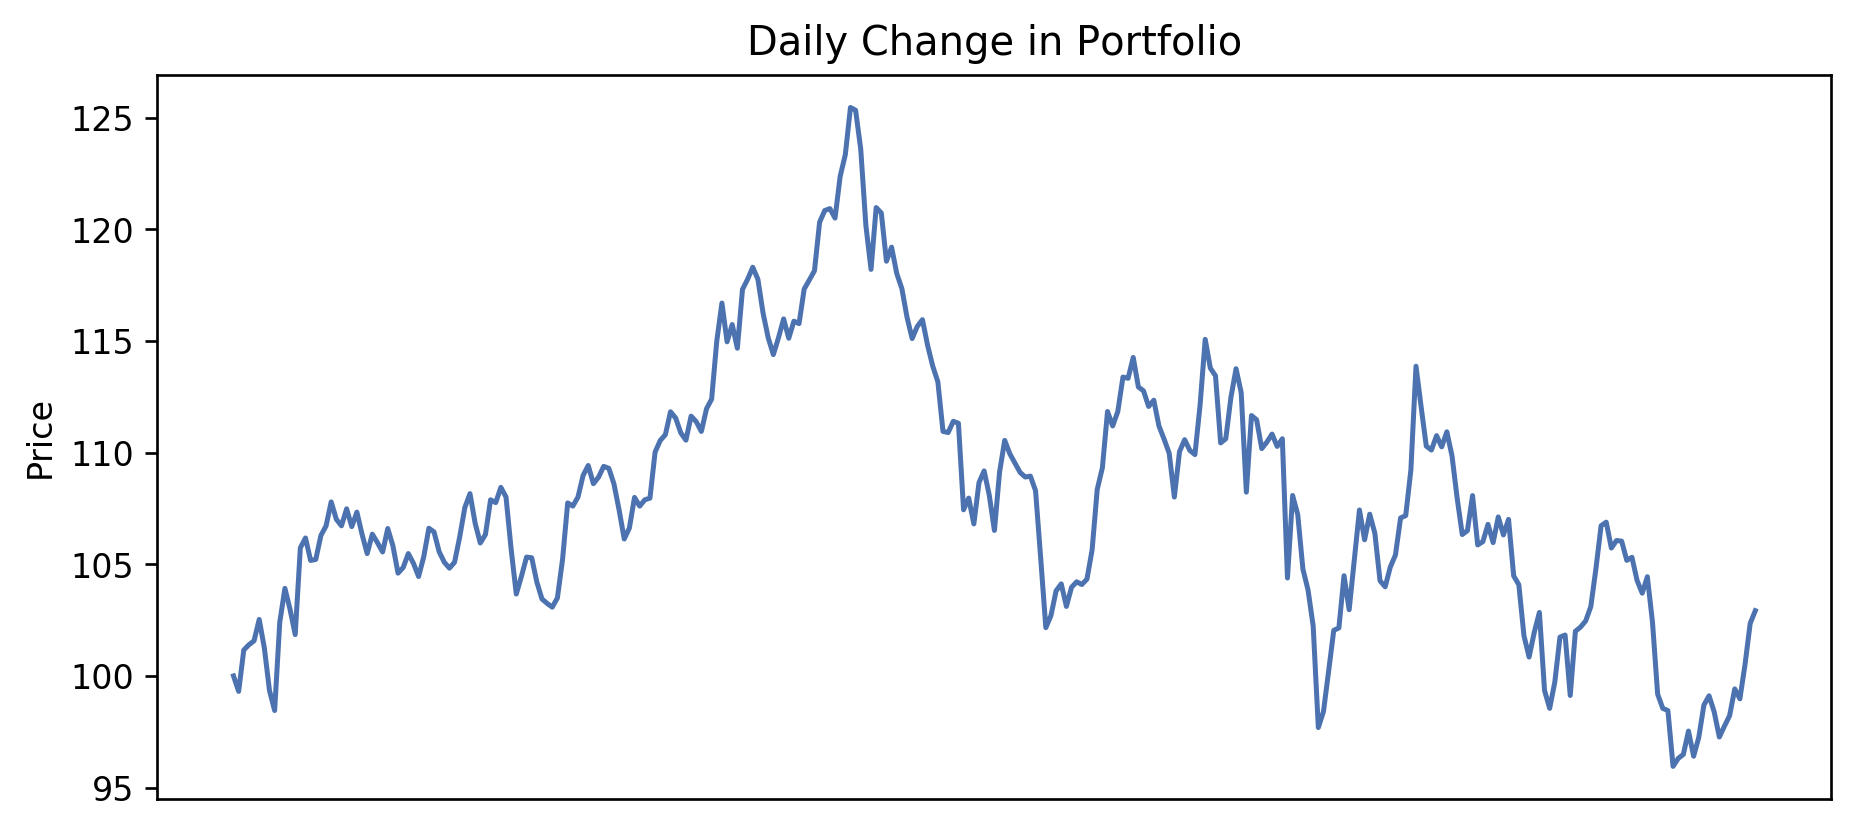

In [31]:
Capital, No_Days = 100, 40
ret = optimization.Portfolio_SD_Return(df,Capital,W,No_Days)
ret

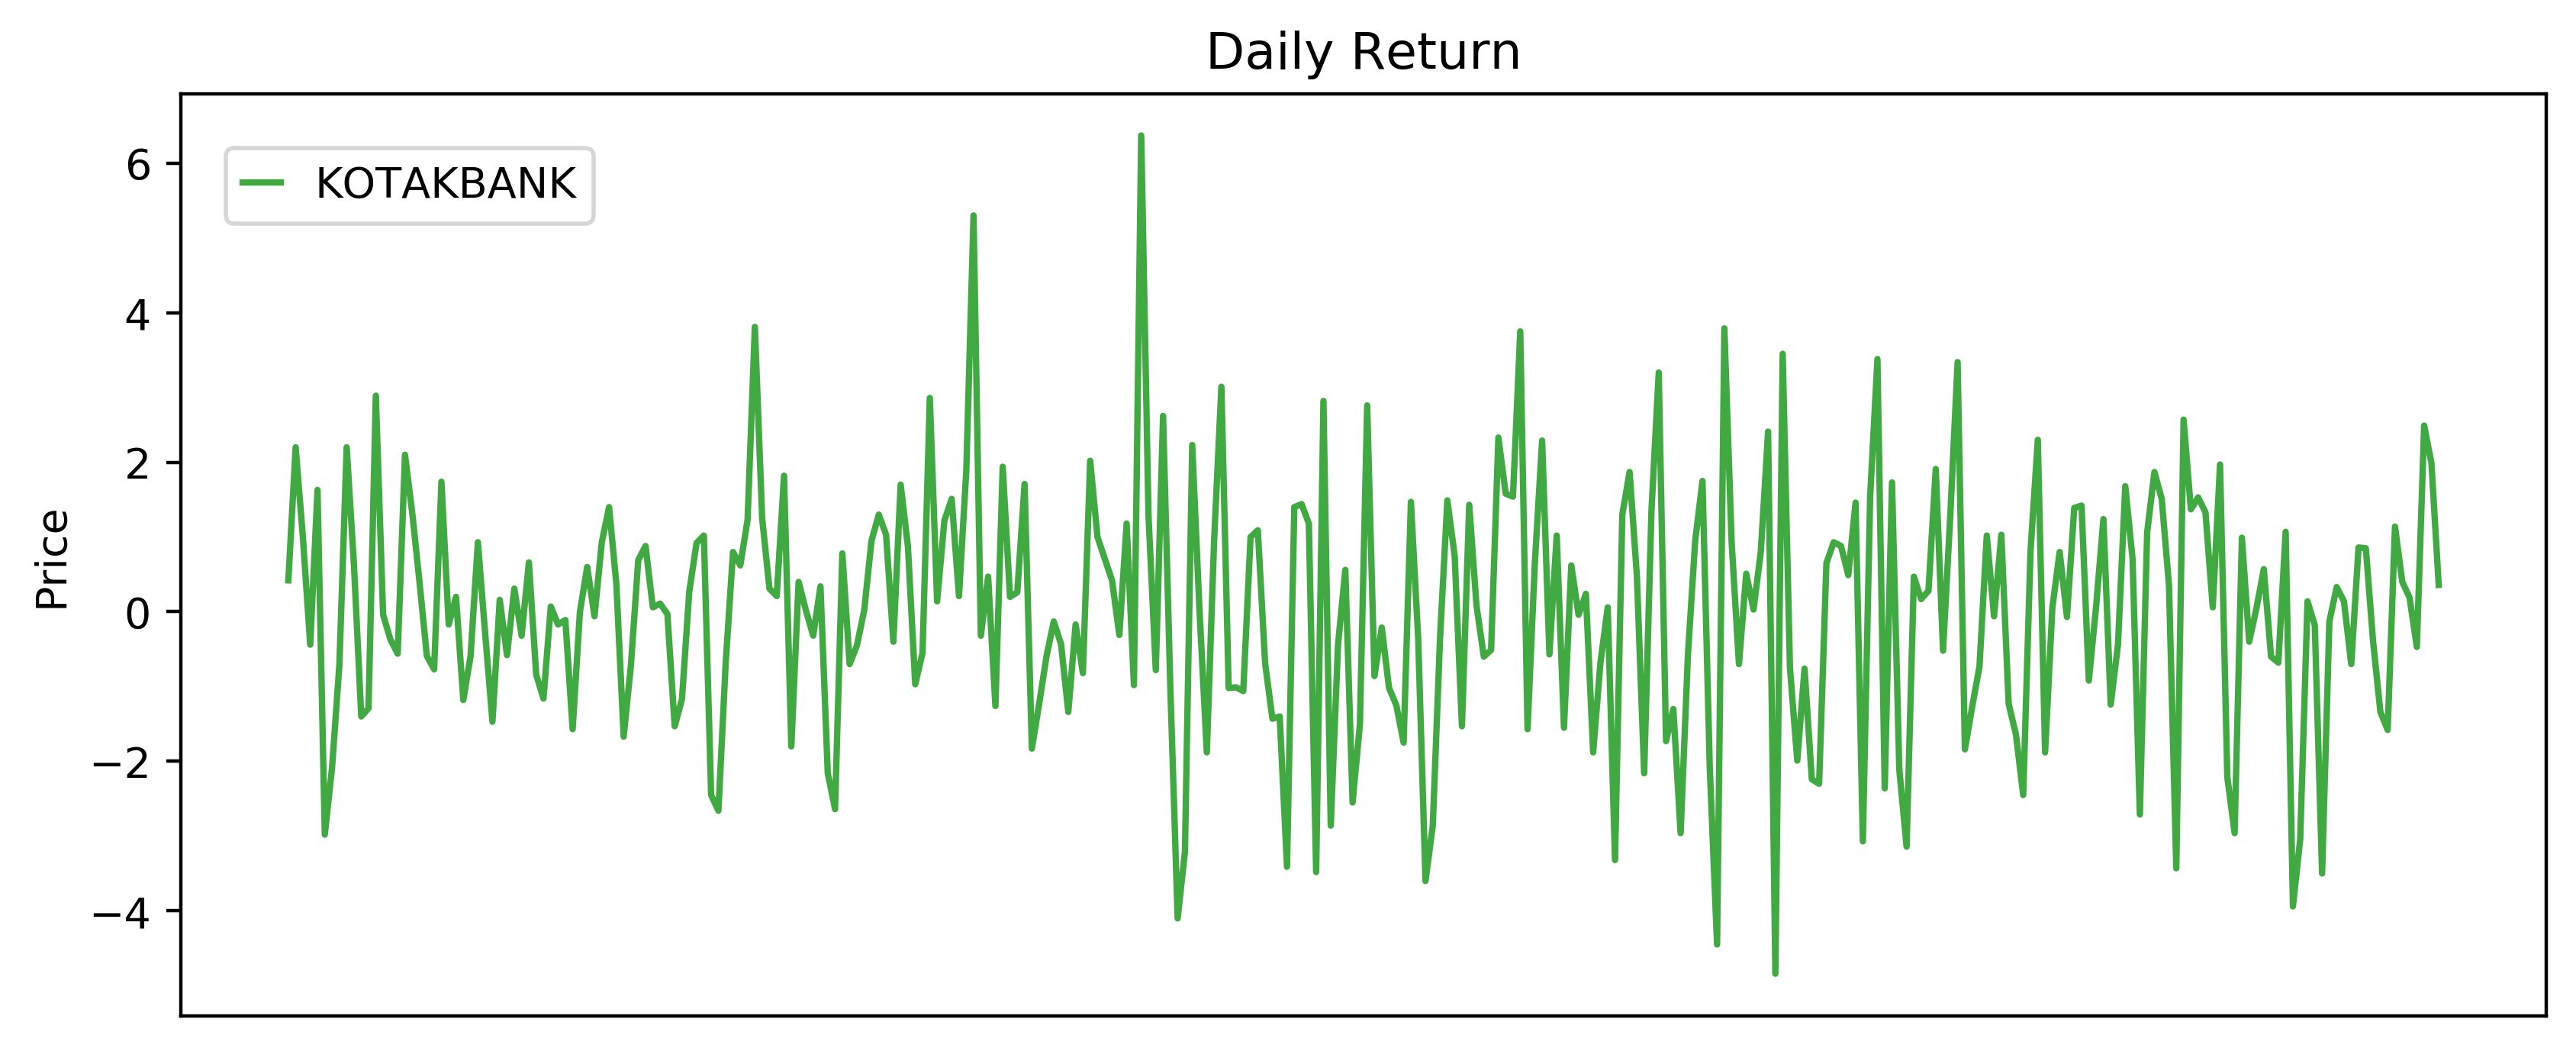

In [50]:
date_array = df['Date']
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
fig, ax = plt.subplots(figsize=(10, 4), dpi=400)
plt.title('Daily Return', fontsize=12)
ax.plot(date_array, Ret['KOTAKBANK_Rt %'], linestyle='-', color='tab:green', alpha=0.9,label='KOTAKBANK', linewidth = 1.5)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(fontsize=10)
ax.xaxis.set_major_locator(months)
leg1 = legend(loc='center left', ncol =3, handlelength = .9, columnspacing = 0.3, 
frameon = True, fancybox=True, shadow=False, bbox_to_anchor=(0.01, 0.9))
ylabel('Price')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)